In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [2]:
pd.set_option('display.max_columns', None)

# Feladat:
Telekommunikációs cég ügyfeleinek lemorzsolódását tartalmazza az adathalmaz. 
A feladat, hogy alakítsunk ki az ügyfelekből a tulajdonságaik alapján szegmenseket a KMeans algoritmus segítségével.

A csoportosításhoz ne használd fel az alábbi változókat:
- churn?: ügyfél lemorzsolódott-e
- Contract_date: szerződéskötés ideje
- Cust_ID: ügyfélazonosító

In [3]:
df = pd.read_csv('telco_sampled.csv', sep = ';')

In [4]:
df.head()

,Contract_date,Package,Gender,Age,Marital_Status,Living_Condition,Graduation,Job_Type,Income,Peak_minute_09,Weekend_minute_09,Offpeak_minute_09,Offpeak_nr_09,Peak_nr_09,Weekend_nr_09,Selfnet_minute_09,Fixed_minute_09,Othermob_minute_09,Voicemail_nr_09,Voicemail_minute_09,SMS_09,Peak_minute_10,Weekend_minute_10,Offpeak_minute_10,Offpeak_nr_10,Peak_nr_10,Weekend_nr_10,Selfnet_minute_10,Fixed_minute_10,Othermob_minute_10,Voicemail_nr_10,Voicemail_minute_10,SMS_10,Peak_minute_11,Weekend_minute_11,Offpeak_minute_11,Offpeak_nr_11,Peak_nr_11,Weekend_nr_11,Selfnet_minute_11,Fixed_minute_11,Othermob_minute_11,Voicemail_nr_11,Voicemail_minute_11,SMS_11,Peak_minute_12,Weekend_minute_12,Offpeak_minute_12,Offpeak_nr_12,Peak_nr_12,Weekend_nr_12,Selfnet_minute_12,Fixed_minute_12,Othermob_minute_12,Voicemail_nr_12,Voicemail_minute_12,SMS_12,churn?,Cust_ID
0,9/20/04 12:00 AM,PACK_B,Male,42.0,Married,Owner,University,Leader,15_30k,0.55,0.28,0.00,0.0,2.0,1.0,0.83,0.00,0.00,3.0,0.83,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0,ID0020614
1,2/12/05 12:00 AM,PACK_B,Female,53.0,Married,Owner,University,Public_Employee,Below_15k,11.32,6.53,6.98,26.0,37.0,19.0,6.70,8.02,10.12,21.0,21.90,58.0,25.70,5.28,15.38,52.0,77.0,32.0,11.07,12.80,22.50,30.0,37.33,128.0,25.33,0.00,7.60,51.0,49.0,20.0,1.83,14.52,16.58,36.0,32.93,83.0,11.95,3.60,4.28,25.0,40.0,25.0,0.93,6.20,12.70,21.0,19.83,66.0,0,ID0029505
2,10/19/04 12:00 AM,PACK_X,Male,43.0,Married,Owner,Highschool,Executive,30_60k,78.05,3.90,8.43,5.0,103.0,9.0,19.67,2.83,67.88,116.0,90.38,1.0,24.30,15.53,2.63,9.0,40.0,16.0,17.15,1.68,23.35,65.0,42.47,0.0,55.27,1.27,1.75,7.0,64.0,4.0,6.63,15.45,36.20,74.0,58.28,1.0,9.97,8.65,4.23,3.0,22.0,18.0,2.98,0.38,9.40,31.0,22.07,12.0,0,ID0050206
3,10/31/04 12:00 AM,PACK_B,Male,32.0,Married,Owner,Highschool,Labourer,15_30k,0.08,0.00,0.00,0.0,1.0,0.0,0.08,0.00,0.00,1.0,0.08,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0,ID0050343
4,11/19/04 12:00 AM,PACK_B,Female,31.0,Married,Owner,Highschool,Public_Employee,30_60k,20.68,13.87,33.27,49.0,30.0,26.0,37.90,0.53,23.02,79.0,67.82,26.0,42.08,24.48,31.10,39.0,56.0,28.0,65.58,1.53,26.10,100.0,97.67,23.0,31.52,28.27,28.37,33.0,48.0,46.0,50.80,0.62,31.17,103.0,86.70,21.0,49.68,35.90,29.45,69.0,78.0,47.0,71.17,2.13,31.05,121.0,111.40,64.0,0,ID0050688


# 1. Részfeladat: (ADATELŐKÉSZÍTÉS)
A fenti három változó kivételével használd fel az összes változót a klaszterek kialakításakor. Végezz adatelőkészítést, hogy a változók megfelelő formában kerüljenek a modell bemenetére.

(tipp: kategorikus változók, hiányzó értékek, skálázás stb.)

In [7]:
df.isna().sum()

Contract_date          0
Package                0
Gender                 0
Age                    0
Marital_Status         0
Living_Condition       0
Graduation             0
Job_Type               0
Income                 0
Peak_minute_09         0
Weekend_minute_09      0
Offpeak_minute_09      0
Offpeak_nr_09          0
Peak_nr_09             0
Weekend_nr_09          0
Selfnet_minute_09      0
Fixed_minute_09        0
Othermob_minute_09     0
Voicemail_nr_09        1
Voicemail_minute_09    1
SMS_09                 0
Peak_minute_10         0
Weekend_minute_10      0
Offpeak_minute_10      0
Offpeak_nr_10          0
Peak_nr_10             0
Weekend_nr_10          0
Selfnet_minute_10      0
Fixed_minute_10        0
Othermob_minute_10     0
Voicemail_nr_10        1
Voicemail_minute_10    0
SMS_10                 0
Peak_minute_11         0
Weekend_minute_11      0
Offpeak_minute_11      0
Offpeak_nr_11          0
Peak_nr_11             0
Weekend_nr_11          0
Selfnet_minute_11      0


In [18]:
df[df['Voicemail_nr_09']]

,Contract_date,Package,Gender,Age,Marital_Status,Living_Condition,Graduation,Job_Type,Income,Peak_minute_09,Weekend_minute_09,Offpeak_minute_09,Offpeak_nr_09,Peak_nr_09,Weekend_nr_09,Selfnet_minute_09,Fixed_minute_09,Othermob_minute_09,Voicemail_nr_09,Voicemail_minute_09,SMS_09,Peak_minute_10,Weekend_minute_10,Offpeak_minute_10,Offpeak_nr_10,Peak_nr_10,Weekend_nr_10,Selfnet_minute_10,Fixed_minute_10,Othermob_minute_10,Voicemail_nr_10,Voicemail_minute_10,SMS_10,Peak_minute_11,Weekend_minute_11,Offpeak_minute_11,Offpeak_nr_11,Peak_nr_11,Weekend_nr_11,Selfnet_minute_11,Fixed_minute_11,Othermob_minute_11,Voicemail_nr_11,Voicemail_minute_11,SMS_11,Peak_minute_12,Weekend_minute_12,Offpeak_minute_12,Offpeak_nr_12,Peak_nr_12,Weekend_nr_12,Selfnet_minute_12,Fixed_minute_12,Othermob_minute_12,Voicemail_nr_12,Voicemail_minute_12,SMS_12,churn?,Cust_ID
620,7/30/05 12:00 AM,PACK_Z,Female,39.0,Widow,Other,University,Public_Employee,30_60k,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,5.0,0.00,0.00,0.87,1.0,0.0,20.0,0.87,0.00,0.00,1.0,0.87,20.0,0.00,0.00,0.00,0.0,19.0,20.0,0.00,0.00,0.00,0.0,0.00,20.0,0.00,0.00,0.00,1.0,1.0,0.0,0.77,0.0,0.00,1.0,0.77,19.0,0,ID3954338
641,3/2/05 12:00 AM,PACK_B,Male,30.0,Married,Owner,Highschool,Public_Employee,30_60k,0.0,0.00,0.00,2.0,0.0,2.0,0.00,0.0,0.0,0.0,0.0,4.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.22,1.0,0.0,0.0,0.00,0.22,0.00,1.0,0.22,0.0,0.42,0.00,0.00,0.0,1.0,0.0,0.42,0.0,0.00,1.0,0.42,0.0,0,ID4052331
665,7/17/05 12:00 AM,PACK_Z,Male,30.0,Married,Owner,Highschool,Labourer,30_60k,0.0,0.00,0.00,1.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,24.0,20.83,31.13,2.38,7.0,60.0,59.0,24.15,4.97,24.78,87.0,54.62,139.0,67.33,60.83,16.12,46.0,230.0,108.0,64.33,4.75,106.80,229.0,177.92,276.0,0.00,15.70,1.98,14.0,1.0,97.0,2.10,0.0,23.97,51.0,25.93,87.0,0,ID4154310
717,10/27/05 12:00 AM,PACK_X,Male,29.0,Married,Owner,Highschool,Labourer,30_60k,0.0,0.00,0.00,1.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,1,ID4455039
718,8/15/05 12:00 AM,PACK_X,Male,42.0,Married,Owner,Highschool,Labourer,30_60k,0.0,0.00,2.27,8.0,8.0,12.0,2.27,0.0,0.0,0.0,0.0,25.0,0.03,0.00,0.33,45.0,15.0,16.0,0.33,0.00,0.03,3.0,0.37,73.0,1.33,2.07,0.35,48.0,31.0,38.0,1.63,0.15,1.97,10.0,3.75,107.0,0.28,0.65,0.12,57.0,44.0,38.0,0.00,0.0,1.05,5.0,1.05,116.0,0,ID4455302
1439,12/30/05 12:00 AM,PACK_E,Male,39.0,Widow,Owner,Highschool,Retired,30_60k,0.0,0.02,0.00,0.0,0.0,1.0,0.02,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0,ID9155979
1502,12/16/05 12:00 AM,PACK_X,Male,26.0,Married,Other,University,Leader,Over_60k,0.0,0.00,0.00,0.0,0.0,1.0,0.00,0.0,0.0,0.0,0.0,1.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0,ID9555602


In [22]:
df[df['Voicemail_nr_09'].isna()==True] 

,Contract_date,Package,Gender,Age,Marital_Status,Living_Condition,Graduation,Job_Type,Income,Peak_minute_09,Weekend_minute_09,Offpeak_minute_09,Offpeak_nr_09,Peak_nr_09,Weekend_nr_09,Selfnet_minute_09,Fixed_minute_09,Othermob_minute_09,Voicemail_nr_09,Voicemail_minute_09,SMS_09,Peak_minute_10,Weekend_minute_10,Offpeak_minute_10,Offpeak_nr_10,Peak_nr_10,Weekend_nr_10,Selfnet_minute_10,Fixed_minute_10,Othermob_minute_10,Voicemail_nr_10,Voicemail_minute_10,SMS_10,Peak_minute_11,Weekend_minute_11,Offpeak_minute_11,Offpeak_nr_11,Peak_nr_11,Weekend_nr_11,Selfnet_minute_11,Fixed_minute_11,Othermob_minute_11,Voicemail_nr_11,Voicemail_minute_11,SMS_11,Peak_minute_12,Weekend_minute_12,Offpeak_minute_12,Offpeak_nr_12,Peak_nr_12,Weekend_nr_12,Selfnet_minute_12,Fixed_minute_12,Othermob_minute_12,Voicemail_nr_12,Voicemail_minute_12,SMS_12,churn?,Cust_ID
1518,8/19/05 12:00 AM,PACK_C,Male,26.0,Single,Owner,Highschool,Labourer,15_30k,251.43,91.62,156.58,287.0,674.0,220.0,192.92,26.33,372.57,NaN,595.47,67.0,140.87,117.95,109.43,228.0,434.0,318.0,189.23,15.48,223.9,NaN,428.92,69.0,109.1,89.23,95.38,141.0,306.0,188.0,194.43,2.38,116.02,651.0,312.83,39.0,3.77,1.38,0.97,15.0,44.0,15.0,7.25,0.0,0.0,97.0,7.25,0.0,1,ID9654687


Text(0, 0.5, 'nr')

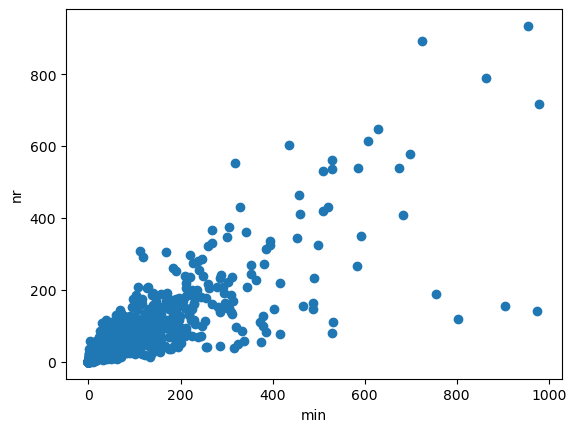

In [32]:

plt.scatter(df['Voicemail_minute_09'],df['Voicemail_nr_09'])
plt.xlabel('min')
plt.ylabel('nr')

In [40]:
df_over = df[df['Voicemail_minute_09']<650]
df_over = df_over[df_over['Voicemail_minute_09']>550]

In [41]:
df_over['Voicemail_nr_09'].mean()

483.2

In [45]:
df['Voicemail_nr_09']=df['Voicemail_nr_09'].fillna(483.2)

In [52]:
df 

,Contract_date,Package,Gender,Age,Marital_Status,Living_Condition,Graduation,Job_Type,Income,Peak_minute_09,Weekend_minute_09,Offpeak_minute_09,Offpeak_nr_09,Peak_nr_09,Weekend_nr_09,Selfnet_minute_09,Fixed_minute_09,Othermob_minute_09,Voicemail_nr_09,Voicemail_minute_09,SMS_09,Peak_minute_10,Weekend_minute_10,Offpeak_minute_10,Offpeak_nr_10,Peak_nr_10,Weekend_nr_10,Selfnet_minute_10,Fixed_minute_10,Othermob_minute_10,Voicemail_nr_10,Voicemail_minute_10,SMS_10,Peak_minute_11,Weekend_minute_11,Offpeak_minute_11,Offpeak_nr_11,Peak_nr_11,Weekend_nr_11,Selfnet_minute_11,Fixed_minute_11,Othermob_minute_11,Voicemail_nr_11,Voicemail_minute_11,SMS_11,Peak_minute_12,Weekend_minute_12,Offpeak_minute_12,Offpeak_nr_12,Peak_nr_12,Weekend_nr_12,Selfnet_minute_12,Fixed_minute_12,Othermob_minute_12,Voicemail_nr_12,Voicemail_minute_12,SMS_12,churn?,Cust_ID
0,9/20/04 12:00 AM,PACK_B,Male,42.0,Married,Owner,University,Leader,15_30k,0.55,0.28,0.00,0.0,2.0,1.0,0.83,0.00,0.00,3.0,0.83,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0,ID0020614
1,2/12/05 12:00 AM,PACK_B,Female,53.0,Married,Owner,University,Public_Employee,Below_15k,11.32,6.53,6.98,26.0,37.0,19.0,6.70,8.02,10.12,21.0,21.90,58.0,25.70,5.28,15.38,52.0,77.0,32.0,11.07,12.80,22.50,30.0,37.33,128.0,25.33,0.00,7.60,51.0,49.0,20.0,1.83,14.52,16.58,36.0,32.93,83.0,11.95,3.60,4.28,25.0,40.0,25.0,0.93,6.20,12.70,21.0,19.83,66.0,0,ID0029505
2,10/19/04 12:00 AM,PACK_X,Male,43.0,Married,Owner,Highschool,Executive,30_60k,78.05,3.90,8.43,5.0,103.0,9.0,19.67,2.83,67.88,116.0,90.38,1.0,24.30,15.53,2.63,9.0,40.0,16.0,17.15,1.68,23.35,65.0,42.47,0.0,55.27,1.27,1.75,7.0,64.0,4.0,6.63,15.45,36.20,74.0,58.28,1.0,9.97,8.65,4.23,3.0,22.0,18.0,2.98,0.38,9.40,31.0,22.07,12.0,0,ID0050206
3,10/31/04 12:00 AM,PACK_B,Male,32.0,Married,Owner,Highschool,Labourer,15_30k,0.08,0.00,0.00,0.0,1.0,0.0,0.08,0.00,0.00,1.0,0.08,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0,ID0050343
4,11/19/04 12:00 AM,PACK_B,Female,31.0,Married,Owner,Highschool,Public_Employee,30_60k,20.68,13.87,33.27,49.0,30.0,26.0,37.90,0.53,23.02,79.0,67.82,26.0,42.08,24.48,31.10,39.0,56.0,28.0,65.58,1.53,26.10,100.0,97.67,23.0,31.52,28.27,28.37,33.0,48.0,46.0,50.80,0.62,31.17,103.0,86.70,21.0,49.68,35.90,29.45,69.0,78.0,47.0,71.17,2.13,31.05,121.0,111.40,64.0,0,ID0050688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1560,7/11/05 12:00 AM,PACK_X,Female,34.0,Married,Owner,Highschool,Public_Employee,15_30k,5.80,1.92,0.08,1.0,8.0,3.0,0.90,1.65,5.25,12.0,7.80,0.0,13.15,5.58,0.00,0.0,13.0,7.0,0.67,0.47,17.60,20.0,18.73,0.0,11.00,6.63,4.12,2.0,10.0,6.0,0.00,0.00,21.75,18.0,21.75,0.0,1.07,0.55,0.00,0.0,1.0,1.0,0.00,0.00,2.60,3.0,2.60,0.0,0,ID9954558
1561,7/23/05 12:00 AM,PACK_X,Male,45.0,Married,Other,Highschool,Labourer,15_30k,78.45,26.72,98.12,69.0,118.0,38.0,45.18,7.47,150.25,170.0,203.28,55.0,58.58,16.08,10.53,20.0,107.0,44.0,28.10,1.87,55.23,129.0,85.20,42.0,38.13,12.22,17.60,27.0,87.0,43.0,27.28,4.97,34.17,97.0,66.42,51.0,47.12,23.98,23.22,70.0,96.0,58.0,31.00,0.00,53.10,125.0,84.85,98.0,0,ID9954685
1562,7/20/05 12:00 AM,PACK_X,Male,53.0,Married,Owner,Highschool,Labourer,Below_15k,99.57,16.87,5.47,7.0,73.0,11.0,39.07,0.00,82.83,91.0,121.90,0.0,102.77,47.33,13.63,12.0,84.0,32.0,31.50,17.17,115.07,128.0,163.73,0.0,79.50,24.07,2.02,3.0,58.0,21.0,43.80,7.97,53.82,82.0,105.58,0.0,149.52,43.60,10.03,7.0,109.0,31.0,49.35,28.75,118.37,145.0,196.47,0.0,0,ID9954792
1563,8/13/05 12:00 AM,PACK_X,Male,51.0,Married,Owner,Primary_School,Labourer,15_30k,0.15,0.00,0.00,2.0,5.0,2.0,0.15,0.00,0.00,1.0,0.15,8.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00

In [49]:
df[df['Voicemail_minute_09'].isna()==True]

,Contract_date,Package,Gender,Age,Marital_Status,Living_Condition,Graduation,Job_Type,Income,Peak_minute_09,Weekend_minute_09,Offpeak_minute_09,Offpeak_nr_09,Peak_nr_09,Weekend_nr_09,Selfnet_minute_09,Fixed_minute_09,Othermob_minute_09,Voicemail_nr_09,Voicemail_minute_09,SMS_09,Peak_minute_10,Weekend_minute_10,Offpeak_minute_10,Offpeak_nr_10,Peak_nr_10,Weekend_nr_10,Selfnet_minute_10,Fixed_minute_10,Othermob_minute_10,Voicemail_nr_10,Voicemail_minute_10,SMS_10,Peak_minute_11,Weekend_minute_11,Offpeak_minute_11,Offpeak_nr_11,Peak_nr_11,Weekend_nr_11,Selfnet_minute_11,Fixed_minute_11,Othermob_minute_11,Voicemail_nr_11,Voicemail_minute_11,SMS_11,Peak_minute_12,Weekend_minute_12,Offpeak_minute_12,Offpeak_nr_12,Peak_nr_12,Weekend_nr_12,Selfnet_minute_12,Fixed_minute_12,Othermob_minute_12,Voicemail_nr_12,Voicemail_minute_12,SMS_12,churn?,Cust_ID
409,2/12/05 12:00 AM,PACK_E,Male,37.0,Divorced,Owner,University,Executive,Over_60k,580.38,128.4,301.78,50.0,138.0,39.0,829.23,36.85,139.63,218.0,NaN,9.0,216.83,166.65,217.42,49.0,63.0,48.0,492.57,60.6,44.48,154.0,600.9,6.0,169.88,108.2,45.05,16.0,70.0,30.0,160.0,151.27,6.8,107.0,318.07,7.0,110.42,102.68,80.18,28.0,54.0,26.0,140.68,123.25,11.53,98.0,275.47,6.0,0,ID2628722


In [53]:
df['Voicemail_nr_09'].value_counts()

Voicemail_nr_09
1.0      125
2.0       53
3.0       52
4.0       40
5.0       38
        ... 
431.0      1
361.0      1
411.0      1
603.0      1
483.2      1
Name: count, Length: 232, dtype: int64

In [57]:
df_over_nr = df[df['Voicemail_nr_09']>190.0]
df_over_nr = df_over_nr[df_over_nr['Voicemail_nr_09']<250.0]

In [60]:
df_over_nr['Voicemail_minute_09'].mean()

260.8957692307692

In [61]:
df['Voicemail_minute_09']=df['Voicemail_minute_09'].fillna(260.89)

Text(0, 0.5, 'nr')

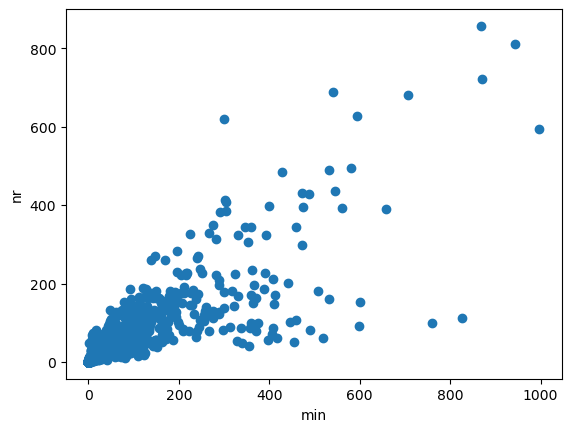

In [79]:
plt.scatter(df['Voicemail_minute_10'],df['Voicemail_nr_10'])
plt.xlabel('min')
plt.ylabel('nr')

In [ ]:
## összefüggnek az értékek, az átlagok nem térnek el nagy mértékben

In [80]:
df['Voicemail_minute_12']=df['Voicemail_minute_12'].fillna(260.89)

In [70]:
df['Voicemail_minute_11']=df['Voicemail_minute_11'].fillna(260.89)

In [71]:
df['Voicemail_nr_10']=df['Voicemail_nr_10'].fillna(483.2)

In [72]:
df['Voicemail_nr_11']=df['Voicemail_nr_11'].fillna(483.2)

Text(0, 0.5, 'nr')

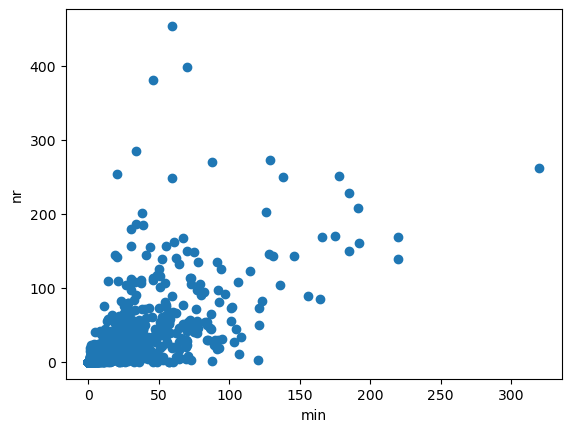

In [73]:
plt.scatter(df['Offpeak_nr_12'],df['Offpeak_minute_12'])
plt.xlabel('min')
plt.ylabel('nr')

In [74]:
df[df['Offpeak_minute_12'].isna()==True]

,Contract_date,Package,Gender,Age,Marital_Status,Living_Condition,Graduation,Job_Type,Income,Peak_minute_09,Weekend_minute_09,Offpeak_minute_09,Offpeak_nr_09,Peak_nr_09,Weekend_nr_09,Selfnet_minute_09,Fixed_minute_09,Othermob_minute_09,Voicemail_nr_09,Voicemail_minute_09,SMS_09,Peak_minute_10,Weekend_minute_10,Offpeak_minute_10,Offpeak_nr_10,Peak_nr_10,Weekend_nr_10,Selfnet_minute_10,Fixed_minute_10,Othermob_minute_10,Voicemail_nr_10,Voicemail_minute_10,SMS_10,Peak_minute_11,Weekend_minute_11,Offpeak_minute_11,Offpeak_nr_11,Peak_nr_11,Weekend_nr_11,Selfnet_minute_11,Fixed_minute_11,Othermob_minute_11,Voicemail_nr_11,Voicemail_minute_11,SMS_11,Peak_minute_12,Weekend_minute_12,Offpeak_minute_12,Offpeak_nr_12,Peak_nr_12,Weekend_nr_12,Selfnet_minute_12,Fixed_minute_12,Othermob_minute_12,Voicemail_nr_12,Voicemail_minute_12,SMS_12,churn?,Cust_ID
413,4/15/05 12:00 AM,PACK_B,Female,23.0,Divorced,Owner,Highschool,Public_Employee,30_60k,50.02,60.25,95.12,100.0,39.0,45.0,153.37,9.62,42.03,158.0,140.38,1.0,34.45,41.65,28.87,60.0,17.0,58.0,66.33,3.18,35.45,127.0,94.98,3.0,82.37,195.38,423.37,119.0,44.0,65.0,679.68,0.0,18.22,168.0,600.92,6.0,260.73,743.7,NaN,222.0,74.0,78.0,NaN,2.83,38.88,300.0,NaN,22.0,0,ID2651879


In [75]:
df_over_nr = df[df['Offpeak_nr_12']>200.0]
df_over_nr = df_over_nr[df_over_nr['Offpeak_nr_12']<240.0]

In [76]:
df_over_nr['Offpeak_nr_12'].mean()

220.66666666666666

In [77]:
df['Offpeak_minute_12']=df['Offpeak_minute_12'].fillna(220.6)

In [88]:
df['Selfnet_minute_12'].mean()

23.184488491048594

In [89]:
df['Othermob_minute_12'].mean()

30.650754475703323

In [90]:
df['Selfnet_minute_12']=df['Selfnet_minute_12'].fillna(23.1)

In [91]:
df['Othermob_minute_12']=df['Othermob_minute_12'].fillna(30.6)

In [85]:
import seaborn as sns

<Axes: >

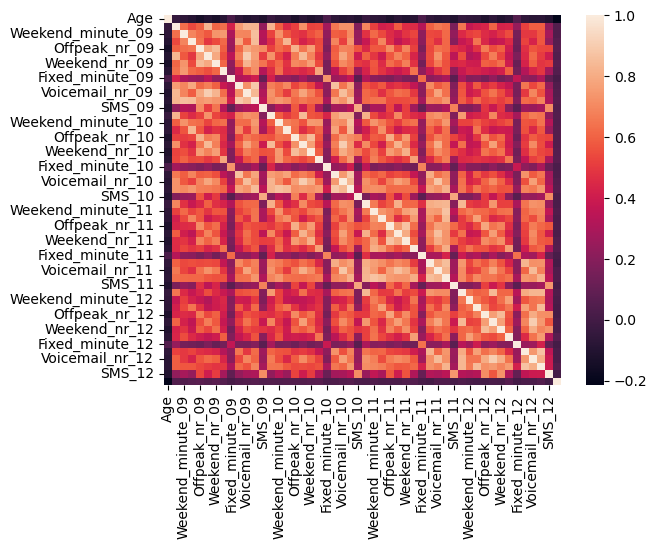

In [87]:
sns.heatmap(df.corr(numeric_only = True))

In [83]:
df.corr(method='pearson',numeric_only = True)

,Age,Peak_minute_09,Weekend_minute_09,Offpeak_minute_09,Offpeak_nr_09,Peak_nr_09,Weekend_nr_09,Selfnet_minute_09,Fixed_minute_09,Othermob_minute_09,Voicemail_nr_09,Voicemail_minute_09,SMS_09,Peak_minute_10,Weekend_minute_10,Offpeak_minute_10,Offpeak_nr_10,Peak_nr_10,Weekend_nr_10,Selfnet_minute_10,Fixed_minute_10,Othermob_minute_10,Voicemail_nr_10,Voicemail_minute_10,SMS_10,Peak_minute_11,Weekend_minute_11,Offpeak_minute_11,Offpeak_nr_11,Peak_nr_11,Weekend_nr_11,Selfnet_minute_11,Fixed_minute_11,Othermob_minute_11,Voicemail_nr_11,Voicemail_minute_11,SMS_11,Peak_minute_12,Weekend_minute_12,Offpeak_minute_12,Offpeak_nr_12,Peak_nr_12,Weekend_nr_12,Selfnet_minute_12,Fixed_minute_12,Othermob_minute_12,Voicemail_nr_12,Voicemail_minute_12,SMS_12,churn?
Age,1.000000,-0.045769,-0.062612,-0.092145,-0.136969,-0.096818,-0.129179,-0.081163,0.017181,-0.066927,-0.102302,-0.082325,-0.111542,-0.037269,-0.073370,-0.070920,-0.120725,-0.080608,-0.112480,-0.088074,0.027521,-0.062436,-0.089134,-0.073309,-0.101546,-0.037080,-0.068406,-0.078115,-0.115286,-0.078645,-0.105382,-0.084743,0.023655,-0.058877,-0.084392,-0.072096,-0.104640,-0.044305,-0.060956,-0.070508,-0.110234,-0.065123,-0.105714,-0.078075,0.050568,-0.058893,-0.077315,-0.073855,-0.106728,-0.213900
Peak_minute_09,-0.045769,1.000000,0.632384,0.538769,0.594414,0.831368,0.607710,0.632102,0.423448,0.756246,0.830688,0.825788,0.227440,0.825702,0.589389,0.450969,0.514653,0.724657,0.525626,0.531018,0.278926,0.656730,0.726639,0.725590,0.183134,0.692592,0.520410,0.414395,0.431878,0.587450,0.460291,0.458966,0.327480,0.596377,0.657218,0.626346,0.164020,0.650736,0.375422,0.414100,0.431778,0.601974,0.429297,0.436885,0.240987,0.518708,0.589512,0.590263,0.226602,0.045056
Weekend_minute_09,-0.062612,0.632384,1.000000,0.688432,0.626369,0.577408,0.732681,0.747262,0.304446,0.695188,0.691429,0.859415,0.328060,0.521337,0.726812,0.565570,0.504440,0.476073,0.550461,0.598104,0.230456,0.590260,0.576616,0.703382,0.241224,0.474366,0.617285,0.536677,0.456705,0.410493,0.487423,0.529742,0.222233,0.537077,0.527544,0.616503,0.234129,0.449989,0.510406,0.532242,0.456657,0.425381,0.479850,0.545929,0.147370,0.494906,0.493386,0.573108,0.285198,0.040837
Offpeak_minute_09,-0.092145,0.538769,0.688432,1.000000,0.644450,0.491294,0.543333,0.619839,0.263998,0.789911,0.582871,0.849374,0.312609,0.455669,0.638806,0.832525,0.530338,0.424546,0.480153,0.537225,0.204964,0.689215,0.513003,0.741423,0.255434,0.383272,0.524011,0.696460,0.465455,0.352181,0.420446,0.484666,0.210733,0.553109,0.470731,0.611518,0.203376,0.374512,0.425164,0.645779,0.443414,0.356557,0.383289,0.449989,0.139772,0.524991,0.428285,0.571931,0.239512,0.057056
Offpeak_nr_09,-0.136969,0.594414,0.626369,0.644450,1.000000,0.782137,0.846997,0.590098,0.246544,0.617285,0.790452,0.741653,0.708757,0.517716,0.624328,0.571491,0.818606,0.649932,0.761339,0.546206,0.177533,0.583149,0.687409,0.674064,0.567695,0.447003,0.577436,0.569917,0.713816,0.534301,0.691411,0.520182,0.167328,0.539983,0.636012,0.613557,0.473287,0.438223,0.375158,0.480947,0.663568,0.546839,0.595113,0.405043,0.118983,0.471949,0.565420,0.533341,0.526943,0.069717
Peak_nr_09,-0.096818,0.831368,0.577408,0.491294,0.782137,1.000000,0.795029,0.549658,0.348514,0.672989,0.904338,0.761450,0.504793,0.726459,0.528455,0.424603,0.665250,0.847483,0.683019,0.493138,0.226583,0.600013,0.784356,0.664829,0.401272,0.592510,0.488996,0.394566,0.572301,0.682988,0.605364,0.433396,0.225121,0.547114,0.729095,0.572055,0.347443,0.545626,0.317744,0.356036,0.535487,0.672147,0.526376,0.368932,0.172453,0.453189,0.620398,0.506723,0.402856,0.050642
Weekend_nr_09,-0.129179,0.607710,0.732681,0.543333,0.846997,0.795029,1.000000,0.607282,0.230803,0.593439,0.825919,0.732465,0.647746,0.530121,0.615555,0.482206,0.700728,0.674041,0.761598,0.542088,0.157516,0.551637,0.703253,0.645610,0.500131,0.471553,0.571894,0.459087,0.628704,0.567190,0.674010,0.476962,0.146465,0.530772,0.662682,0.558259,0.432926,0.452405,0.405627,0.399339,0.594563,0.576128,0.633388,0.401033,0.1

In [99]:
df['Graduation'].value_counts()

Graduation
Highschool        1142
University         387
Primary_School      36
Name: count, dtype: int64

In [100]:
df['Job_Type'].value_counts()

Job_Type
Labourer           584
Public_Employee    582
Executive          205
Leader             109
Retired             82
Other                3
Name: count, dtype: int64

In [92]:
df['Gender']=df['Gender'].apply(lambda x: 1 if x=='Male' else 0)

In [98]:
df.dtypes

Contract_date           object
Package                 object
Gender                   int64
Age                    float64
Marital_Status          object
Living_Condition        object
Graduation              object
Job_Type                object
Income                  object
Peak_minute_09         float64
Weekend_minute_09      float64
Offpeak_minute_09      float64
Offpeak_nr_09          float64
Peak_nr_09             float64
Weekend_nr_09          float64
Selfnet_minute_09      float64
Fixed_minute_09        float64
Othermob_minute_09     float64
Voicemail_nr_09        float64
Voicemail_minute_09    float64
SMS_09                 float64
Peak_minute_10         float64
Weekend_minute_10      float64
Offpeak_minute_10      float64
Offpeak_nr_10          float64
Peak_nr_10             float64
Weekend_nr_10          float64
Selfnet_minute_10      float64
Fixed_minute_10        float64
Othermob_minute_10     float64
Voicemail_nr_10        float64
Voicemail_minute_10    float64
SMS_10  

# 2. Részfeladat: (KLASZTEREZÉS)

In [ ]:
dct=DecisionTreeClassifier(max_depth=5)
dct.fit(df.loc[:,x_cols],df['cluster_kmeans'])

Az előző feladatrészben előkészített változóiddal keresd meg az optimális k értéket a KMeans algoritmus számára. Ezután végezd el az ügyfelek csoportosítását.

In [ ]:
plt.figure(figsize=(10,10))
plot_tree(dct,feature_names = x_cols)

# 3. Részfeladat: (KLASZTEREK MAGYARÁZATA)

Próbálj magyarázatot találni, hogy mi jellemzi az egyes csoportokat és milyen jellemzők miatt került egy-egy ügyfél az adott klaszterbe.